main goal:

divide N assets into k class. (k is random..)

consider inner and outer relationship of the portfolio.

sometimes may need sub-clustering:)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clean_data.csv', sep = ',', index_col = 0)

In [5]:
data.head()

,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,KO,...,NSM,CLP,CTX,CTR,DYN,AIB,KIM,SFN,TCO,S
11524,590.65,6.60,19.81,15.46,23.32,8.42,9.17,14.32,18.40,12.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11532,581.50,6.40,19.61,15.66,23.32,9.10,9.15,14.30,17.07,12.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11533,584.22,6.30,19.53,15.69,24.21,9.06,9.21,14.36,16.90,12.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11540,592.72,6.64,19.68,16.14,25.46,9.08,9.75,14.67,16.93,12.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11544,597.34,6.84,19.33,15.69,27.11,8.86,9.46,14.40,17.49,12.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
N = 100; # number of time series
T = 200  # time length
q = N/T  # ratio

In [7]:
price = data.iloc[0:T+1, 0:N]
ret = np.log(price).diff()[1:]
corr_ret = np.corrcoef(ret.T)

In [8]:
u, v = np.linalg.eig(corr_ret)

In [9]:
lambda_plus = (1 + np.sqrt(q))**2

In [10]:
def compute_C_minus_C0(lambdas, v, lambda_plus):
    # lambdas is a vector
    # v is an eigenvector matrix
    C_r = np.dot(np.dot(v[:,lambdas < lambda_plus], np.diag(lambdas[lambdas < lambda_plus])), v[:,lambdas < lambda_plus].T)
    C_M = lambdas.max() * np.dot(v[:, lambdas.argmax()], v[:, lambdas.argmax()].T)
    C_0 = C_r + C_M
    C = np.dot(np.dot(v, np.diag(lambdas)), v.T)
    return C - C_0

In [11]:
import community 
import networkx as nx
import matplotlib.pyplot as plt

/home/eric/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


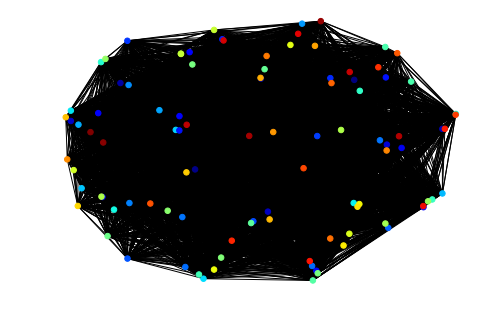

In [12]:
C_s = np.abs(compute_C_minus_C0(u, v, lambda_plus))
G = nx.Graph(C_s)
part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)


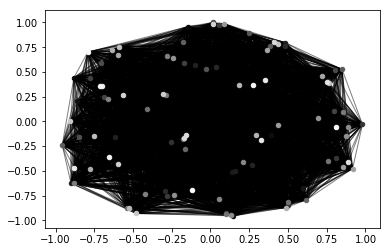

In [11]:
G = nx.Graph(C_s)
partition  = community.best_partition(G)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()